## This is a Feature Engineering notebook. Input is spectra with 1024 channels and output are the moments of spectral windows.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np
import scipy.stats as sp
from itertools import chain
import seaborn as sns

In [93]:
# import the data
#df = pd.read_csv('/Users/mooreet_la/projects/SSAM/Jo_files/industrial_data_norm2.csv')

# This is for the Q2 Fy18 paper on metrics industrial Culpeo  - Should already be sampled 
# and have background added - but NOT normalized
df = pd.read_csv('/Users/mooreet_la/Data_science/Data/culpeo/Culpeo-025600s10m0100n.csv')

In [94]:
# "Sig" = Iso(1st 2 digets), shield(2cd 2), dist?(3rd 2)
# "Bkg" = BK, location, dist (00)
# isotopes = Ba, Co, Cs, Io?, Ir, Se, Tc, AB?
# shield = Bare, concrete, DU, ST, then switches to H0?instead of steel? then back at Ir
# location = Abq (AB), (BW), ...

In [95]:
df.loc[0:110,"Id":"Channel2"]

,Id,Bkg,Sig,Neutrons,TimeTrue,TimeLive,Channel0,Channel1,Channel2
0,0,BKAB00,BABA10,0,256,256,211,807,2678
1,1,BKAB00,BABA10,0,256,256,208,754,2814
2,2,BKAB00,BABA10,0,256,256,235,823,2661
3,3,BKAB00,BABA10,0,256,256,217,809,2708
4,4,BKAB00,BABA10,0,256,256,244,760,2672
5,5,BKAB00,BABA10,0,256,256,205,755,2593
6,6,BKAB00,BABA10,0,256,256,200,780,2611
7,7,BKAB00,BABA10,0,256,256,215,778,2638
8,8,BKAB00,BABA10,0,256,256,224,828,2640
9,9,BKAB00,BABA10,0,256,256,209,824,2716


In [96]:
print(df.shape)
#data_indSamp.shape

(29000, 134)


In [97]:
#data_indSamp.head()

In [98]:
#df['SourceIDs'] = 
#df.columns = ['a', 'b']
#names = list(df)
#names.replace('Sig', 'SourceIDs')
#df=df.rename(columns = {'Neutrons':'SourceIDs'})
df['SourceIDs'] = np.nan
df=df.rename(columns = {'Sig':'Name'})
df.head()

,Id,Bkg,Name,Neutrons,TimeTrue,TimeLive,Channel0,Channel1,Channel2,Channel3,...,Channel119,Channel120,Channel121,Channel122,Channel123,Channel124,Channel125,Channel126,Channel127,SourceIDs
0,0,BKAB00,BABA10,0,256,256,211,807,2678,3336,...,41,30,42,54,71,42,40,23,18,NaN
1,1,BKAB00,BABA10,0,256,256,208,754,2814,3485,...,27,29,37,44,60,44,46,30,20,NaN
2,2,BKAB00,BABA10,0,256,256,235,823,2661,3408,...,28,44,46,65,38,61,36,21,14,NaN
3,3,BKAB00,BABA10,0,256,256,217,809,2708,3495,...,37,32,40,65,56,57,43,30,20,NaN
4,4,BKAB00,BABA10,0,256,256,244,760,2672,3447,...,45,53,51,78,55,47,42,30,20,NaN


In [99]:
# recast names  remember BA & CO have duel meanings
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "CO" in name]] = 'Co60'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "BA" in name]] = 'Ba133'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "COBA" in name]] = 'Co60'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "CS" in name]] = 'Cs137'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "IO" in name]] = 'I131'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "IR" in name]] = 'Ir192'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "SE" in name]] = 'Se75'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "TC" in name]] = 'Tc99m'
df['SourceIDs'].iloc[[i for i, name in enumerate(df.Name) if "BK" in name]] = 'Bkg'



C:\Users\mooreet_la\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
# check counts
print(df['SourceIDs'].value_counts())
#df

Se75     4000
Ba133    4000
Tc99m    4000
Cs137    4000
I131     4000
Ir192    4000
Co60     4000
Bkg      1000
Name: SourceIDs, dtype: int64


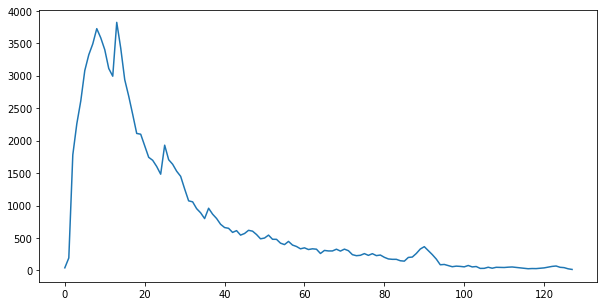

In [101]:
# a quick plot to see one spectrum
y = df.loc[2800,'Channel0':'Channel127']
x = range(0,128)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

In [102]:
# this function will take a DataFrame containing 1024 channel spectra
# and return a DataFrame of the window metrics

def window_metric(low1, low2, high, df):
    metric_names = list(chain(*[('sum'+str(i), 'ratio'+str(i),'mean'+str(i), 'var'+str(i), 'skew'+str(i), 'kurt'+str(i)) 
                                for i in range(20)]))
#    source_names = ['Name', 'Title', 'Strength','SourceIDs']
    source_names = ['Id', 'Bkg', 'Name', 'Neutrons', 'SourceIDs']
    colnames =  source_names + metric_names
    new_df = pd.DataFrame(columns = colnames)
#    new_df.Name = df.Name
#    new_df.Title = df.Title
#    new_df.Strength = df.Strength
#    new_df.SourceIDs = df.SourceIDs
    new_df.Id = df.Id
    new_df.Bkg = df.Bkg
    new_df.Name = df.Name
    new_df.Neutrons = df.Neutrons
    new_df.SourceIDs = df.SourceIDs
    

    for i in range(len(low1)):
        new_df.loc[:,metric_names[i*6]] = np.sum(df.loc[:,low1[i]:low2[i]], axis=1)
        new_df.loc[:,metric_names[i*6+1]] = np.sum(df.loc[:,low1[i]:low2[i]], axis=1)/np.sum(df.loc[:,high[0]:high[1]], axis=1)
        new_df.loc[:,metric_names[i*6+2]] = np.mean(df.loc[:,low1[i]:low2[i]], axis=1)
        new_df.loc[:,metric_names[i*6+3]] = np.var(df.loc[:,low1[i]:low2[i]], axis=1)
        new_df.loc[:,metric_names[i*6+4]] = sp.skew(df.loc[:,low1[i]:low2[i]], axis=1)
        new_df.loc[:,metric_names[i*6+5]] = sp.kurtosis(df.loc[:,low1[i]:low2[i]], axis=1)
       
    return new_df

In [103]:
high = ('Channel100', 'Channel120')
low1 = ['Channel'+str(i*5) for i in range(20)]
low2 = ['Channel'+str(i*5+7) for i in range(20)]

In [104]:
low2

['Channel7',
 'Channel12',
 'Channel17',
 'Channel22',
 'Channel27',
 'Channel32',
 'Channel37',
 'Channel42',
 'Channel47',
 'Channel52',
 'Channel57',
 'Channel62',
 'Channel67',
 'Channel72',
 'Channel77',
 'Channel82',
 'Channel87',
 'Channel92',
 'Channel97',
 'Channel102']

In [105]:
metrics = window_metric(low1, low2, high, df)
metrics.head()

,Id,Bkg,Name,Neutrons,SourceIDs,sum0,ratio0,mean0,var0,skew0,...,mean18,var18,skew18,kurt18,sum19,ratio19,mean19,var19,skew19,kurt19
0,0,BKAB00,BABA10,0,Ba133,28111,30.033120,3513.875,4.308291e+06,-0.253243,...,164.875,8661.859375,0.650647,-1.073249,570,0.608974,71.250,50.687500,0.479310,-1.314560
1,1,BKAB00,BABA10,0,Ba133,28278,28.363089,3534.750,4.275814e+06,-0.312568,...,165.750,9086.937500,0.550193,-1.280235,578,0.579739,72.250,127.937500,-0.162027,-1.108811
2,2,BKAB00,BABA10,0,Ba133,28102,29.001032,3512.750,4.247298e+06,-0.249621,...,168.000,8662.000000,0.465831,-1.263814,547,0.564499,68.375,121.484375,0.475095,-1.258092
3,3,BKAB00,BABA10,0,Ba133,28231,28.866053,3528.875,4.279700e+06,-0.270254,...,159.000,7869.750000,0.535671,-1.195359,544,0.556237,68.000,29.250000,1.251631,0.291694
4,4,BKAB00,BABA10,0,Ba133,27882,29.349474,3485.250,4.164691e+06,-0.288008,...,162.250,8586.687500,0.534892,-1.391232,573,0.603158,71.625,39.984375,0.268596,-0.077259


In [106]:
df.head()

,Id,Bkg,Name,Neutrons,TimeTrue,TimeLive,Channel0,Channel1,Channel2,Channel3,...,Channel119,Channel120,Channel121,Channel122,Channel123,Channel124,Channel125,Channel126,Channel127,SourceIDs
0,0,BKAB00,BABA10,0,256,256,211,807,2678,3336,...,41,30,42,54,71,42,40,23,18,Ba133
1,1,BKAB00,BABA10,0,256,256,208,754,2814,3485,...,27,29,37,44,60,44,46,30,20,Ba133
2,2,BKAB00,BABA10,0,256,256,235,823,2661,3408,...,28,44,46,65,38,61,36,21,14,Ba133
3,3,BKAB00,BABA10,0,256,256,217,809,2708,3495,...,37,32,40,65,56,57,43,30,20,Ba133
4,4,BKAB00,BABA10,0,256,256,244,760,2672,3447,...,45,53,51,78,55,47,42,30,20,Ba133


## Metric Visualizations

In [107]:
# save the new larger data set
#df_temp = df
#metric_temp = metrics
df_temp = df.drop('SourceIDs', axis=1)
labels = pd.DataFrame(df['SourceIDs'])
#labels = df['SourceIDs']
#labels = c('x',labels)
metric_temp = metrics.drop('SourceIDs', axis=1)
df_temp.to_csv('/Users/mooreet_la/Data_science/Data/culpeo/mod_Culpeo-000100s10m0100n.csv', index= False)
labels.to_csv('/Users/mooreet_la/Data_science/Data/culpeo/labels_Culpeo-000100s10m0100n.csv', index= False)
metric_temp.to_csv('/Users/mooreet_la/Data_science/Data/culpeo/metric_Culpeo-000100s10m0100n.csv', index=False)

In [108]:
df_temp.head()
labels.shape
#labels.head()



(29000, 1)

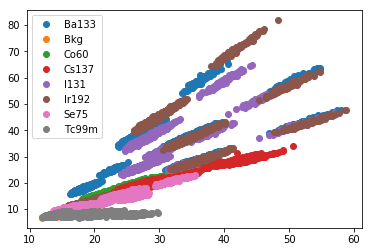

In [109]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.ratio4, group.ratio6, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()

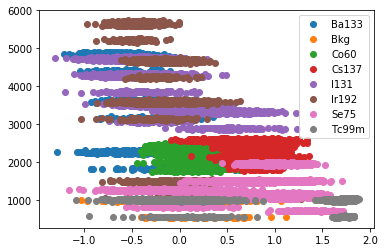

In [110]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.skew4, group.mean6, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()

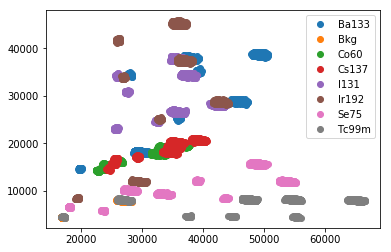

In [111]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.sum1, group.sum6, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()

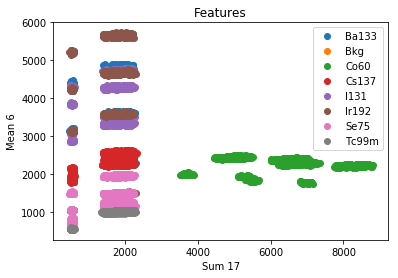

In [112]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    plt.title('Features')
    plt.xlabel('Sum 17')
    plt.ylabel('Mean 6')
    ax.plot(group.sum17, group.mean6, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()
plt.savefig('1_sec_sumMean.png')

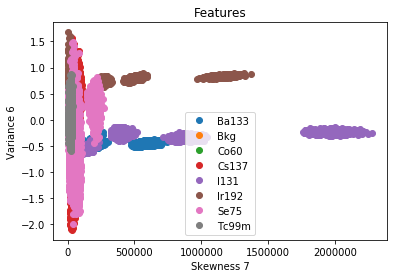

In [113]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    plt.title('Features')
    plt.xlabel('Skewness 7')
    plt.ylabel('Variance 6')
    ax.plot(group.var6, group.skew7, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()
plt.savefig('256_sec_varSkew.png')

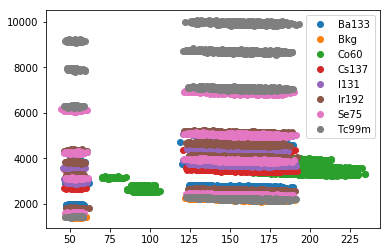

In [114]:
groups = metrics.groupby('SourceIDs')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.mean18, group.mean3, marker = 'o',linestyle='', label=name)
    
ax.legend()
plt.figure(figsize=(10,5))
plt.show()